In [2]:
! pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 1.8 MB/s eta 0:00:00


In [3]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

checkpoint directory created: ./model
saving model version 0.0


In [4]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

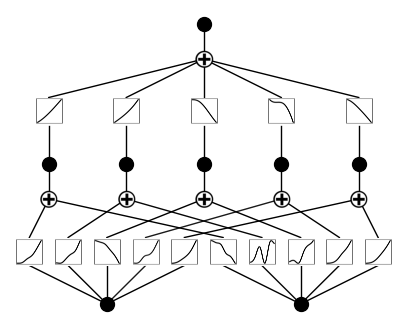

In [5]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [8]:
# train the model
model.fit(dataset, "LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

| train_loss: 1.74e-01 | test_loss: 1.77e-01 | reg: 1.84e+01 | : 100%|█| 20/20 [00:21<00:00,  1.05s/

saving model version 0.1


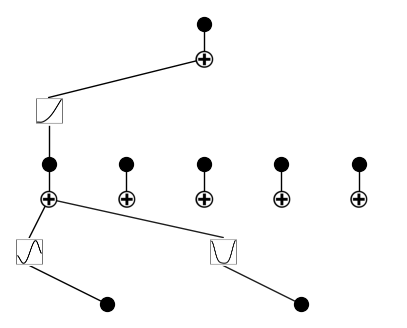

In [9]:
model.plot()

saving model version 0.2


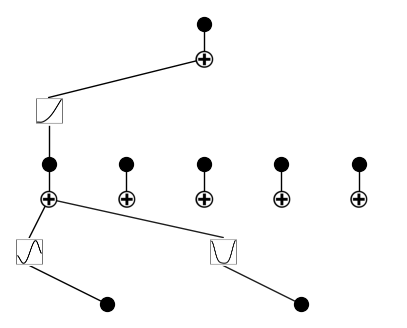

In [11]:
model.prune()
model.plot()

saving model version 0.2


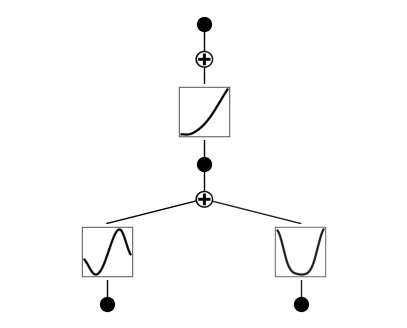

In [12]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [13]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 7.30e-03 | test_loss: 7.24e-03 | reg: 7.62e+00 | : 100%|█| 50/50 [00:07<00:00,  7.08it

saving model version 0.3


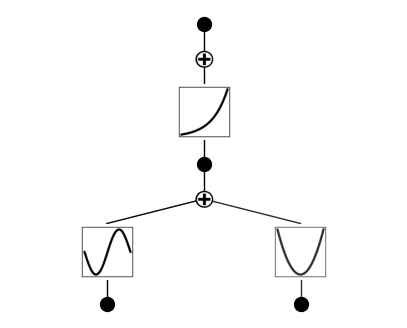

In [14]:
model.plot()

In [15]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999729990959167, c=2
fixing (0,1,0) with x^2, r2=0.9999992251396179, c=2
fixing (1,0,0) with exp, r2=0.9999990463256836, c=2
saving model version 0.4


In [16]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 2.52e-07 | test_loss: 2.42e-07 | reg: 0.00e+00 | : 100%|█| 50/50 [00:04<00:00, 10.05it

saving model version 0.5


In [17]:
model.symbolic_formula()[0][0]

0.999999878839099*exp(1.00000008200833*(-x_2 - 1.18139589175691e-8)**2 + 1.00000009044123*sin(3.14159274101257*x_1 + 3.74500217503737e-8)) + 9.47757499147883e-8